# PISA 2012 Dataset Exploration 
## by Maryse Bonhomme

## Preliminary Wrangling

> PISA is the [OECD's](https://en.wikipedia.org/wiki/OECD) Program for International Students Assessment. The goal of the Program is to assess 15 years old in order to evaluate their skills in Math, Reading and Science. And more importantly to evaluate how prepared to the future they are by asking all sort of questions.
The Survey is done by PISA every 3 years, and assess various areas of the 15 years old. They assess the students life both inside school and out of school, including at home. Asking questions about possessions, family context and even how much time  the students spend on their computers.<p>The dataset that will be used today for analysis is the PISA 2012 survey, with participants from 65 countries.we are using the responses given by the students.
The results is a huge dataset with more than 636  variables and responses from almost 510, 000 students ( 485490 rows are part of this dataset).

In [135]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp
sb.set_style("darkgrid")
sb.set()
from pylab import rcParams
%matplotlib inline

### Analysis Questions
The dataset covers a broad areas of the 15 years old's lives. As part of the analysis today, I will focus  on the following questions:

1. In which Subjects are students getting better scores?
   * In general, do students tends to succeed more in one subject and not the others? <br>
   * Do OECD and Non_OECD perform the same in the tests? <br>
   * On Math, Reading and Science tests, do boys and girls perform the same? is the score distribution the same? 
2. Time spent on computers and Scores
   * How does the time spent on computer affect students scores? does it even have any impact on the student's score?<br>
   * Is it the same for students of both genders?<br>
   * Is it the trend the same in both OECD and non OECD countries?   

In [136]:
#loading the dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('pisa2012.csv',encoding='cp1252')

C:\Users\gwiza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [137]:
# using panda's sample to visually check the data
df.sample(10)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


In [139]:
df.shape

(485490, 636)

### What is the structure of your dataset?

> The PISA dataset is a dataset with 636 columns and 495 489 rows. 

### What is/are the main feature(s) of interest in your dataset?

> The main feature are the scores obtained by the 15 years old. the score will be analyzed and comparison will be made between gender. Also comparison will be made between OECD and Non OECD Countries. 
I was also very interested in discovering if the time spent on computers for these 15 years old effect on scores. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> The following features of the dataset will help get the response I need:									
* The Math Scores
* The Sciences Scores
* Reading Scores
* OECD Column
* Gender Column
* Countries

In [140]:
#selecting the columns that will be used for the analysis
wanted_columns = ['CNT','OECD', 'ST04Q01','TIMEINT','PV1MATH','PV2MATH','PV3MATH',
                  'PV4MATH','PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ','PV5READ', 'PV1SCIE', 'PV2SCIE','PV3SCIE', 
                  'PV4SCIE','PV5SCIE']

In [141]:
#creating a new dataframe with the selected columns
df_selected = df[wanted_columns].copy()

In [142]:
df_selected.sample(5)

,CNT,OECD,ST04Q01,TIMEINT,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
72622,Brazil,Non-OECD,Male,NaN,286.1894,330.5889,317.3469,346.9466,302.5471,379.7829,371.7635,379.7829,351.7149,403.0393,419.0041,416.2066,425.5315,401.2868,420.8691
91091,Canada,OECD,Male,NaN,551.1840,558.1944,555.0787,529.3737,520.0265,582.1137,546.8281,553.2437,570.8864,487.4842,559.3435,558.4110,520.1790,553.7486,515.5166
159523,Spain,OECD,Female,118.0,475.3934,458.2567,434.1097,406.8469,467.6040,597.4840,550.6197,554.5913,478.3375,533.9392,520.7385,454.5319,472.2492,427.4897,494.6289
144608,Denmark,OECD,Male,NaN,390.0218,401.7059,418.8425,424.2951,421.9582,342.4123,368.0745,459.4963,429.8243,429.8243,308.4110,318.6684,398.8624,335.4532,397.9299
122177,Colombia,Non-OECD,Female,NaN,456.8547,435.0444,428.8129,469.3177,381.2977,452.9196,438.6220,400.4951,514.8758,476.7489,459.4741,430.5670,466.9340,488.3812,452.9467


In [143]:
# renaming the selected columns so that it is easier to work with the data
df_selected.rename(columns=
                   {'CNT':'country', 
                    'OECD':'OECD', 
                    'ST01Q01':'international_grade',
                    'ST02Q01':'national_study_program', 
                    'ST04Q01':'gender',
                    'ST28Q01':'number_books',
                    'TIMEINT':'Computer_time',
                    }, inplace=True)

In [144]:
# #checking if columns were renamed
df_selected.head(1)

,country,OECD,gender,Computer_time,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,Albania,Non-OECD,Female,NaN,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.342,406.8496,175.7053,218.5981,341.7009,408.84,348.2283,367.8105,392.9877


In [145]:
#>Each score is represented five times for each participant. 
#so I am going to calculate an average value for each subject, it will be easier to work with only one value per subject.
df_selected['math_average'] =  (df_selected['PV1MATH'] + df_selected['PV2MATH']+ 
                                df_selected['PV3MATH'] + df_selected['PV4MATH'] + df_selected['PV5MATH'])/5
df_selected['reading_average'] = (df_selected ['PV1READ'] + df_selected['PV2READ']+ 
                          df_selected['PV3READ'] + df_selected ['PV4READ'] + df_selected['PV5READ'])/5
df_selected['science_average'] = (df_selected['PV1SCIE'] + df_selected ['PV2SCIE']+ 
                          df_selected['PV3SCIE'] + df_selected['PV4SCIE'] + df_selected['PV5SCIE'])/5

In [146]:
df_selected.head(1)

,country,OECD,gender,Computer_time,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,math_average,reading_average,science_average
0,Albania,Non-OECD,Female,NaN,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.342,406.8496,175.7053,218.5981,341.7009,408.84,348.2283,367.8105,392.9877,366.18634,261.01424,371.91348


In [147]:
# #since I no longoer need the individuals values for the dataframe, I am going to simply drop them
df_selected.drop(['PV1MATH', 'PV2MATH','PV3MATH', 'PV4MATH','PV5MATH','PV1READ','PV2READ','PV3READ','PV4READ','PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], axis=1, inplace=True)

In [148]:
df_selected.head()

,country,OECD,gender,Computer_time,math_average,reading_average,science_average
0,Albania,Non-OECD,Female,NaN,366.18634,261.01424,371.91348
1,Albania,Non-OECD,Female,NaN,470.56396,384.68832,478.12382
2,Albania,Non-OECD,Female,NaN,505.53824,405.18154,486.60946
3,Albania,Non-OECD,Female,NaN,449.45476,477.46376,453.97240
4,Albania,Non-OECD,Female,NaN,385.50398,256.01010,367.15778


In [149]:
#creating an averge score for each students. which is the average score for Math, reading and science
df_selected['av_score'] =  (df_selected['math_average'] + df_selected['reading_average']+ df_selected['science_average'])/3

In [150]:
# I am now going to save the new dataframe to a csv file so that is quicker to laod 
df_selected.to_csv('PISA_Clean.csv', encoding='utf-8', index=False)

In [151]:
#saving to a csv file
df_clean = pd.read_csv('PISA_Clean.csv', encoding='utf-8')
df_clean.head()

,country,OECD,gender,Computer_time,math_average,reading_average,science_average,av_score
0,Albania,Non-OECD,Female,NaN,366.18634,261.01424,371.91348,333.038020
1,Albania,Non-OECD,Female,NaN,470.56396,384.68832,478.12382,444.458700
2,Albania,Non-OECD,Female,NaN,505.53824,405.18154,486.60946,465.776413
3,Albania,Non-OECD,Female,NaN,449.45476,477.46376,453.97240,460.296973
4,Albania,Non-OECD,Female,NaN,385.50398,256.01010,367.15778,336.223953


In [152]:
# checking for null values for the reading, math and science score
[df_clean['math_average'].isnull().sum().sum(), 
 df_clean['reading_average'].isnull().sum().sum(), 
 df_clean['science_average'].isnull().sum().sum(), 
 df_clean['av_score'].isnull().sum().sum()]

[0, 0, 0, 0]

In [153]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 8 columns):
country            485490 non-null object
OECD               485490 non-null object
gender             485490 non-null object
Computer_time      297074 non-null float64
math_average       485490 non-null float64
reading_average    485490 non-null float64
science_average    485490 non-null float64
av_score           485490 non-null float64
dtypes: float64(5), object(3)
memory usage: 29.6+ MB


In [154]:
#creating the 4 groups that I will need to use for later analysis(OECD, Non_OECD, female and male)
OECD = df_clean.query('OECD == "OECD"')
Non_OECD = df_clean.query('OECD=="Non-OECD"')
male= df_clean.query('gender=="Male"')
female = df_clean.query('gender=="Female"')
#verifying
OECD.shape[0], Non_OECD.shape[0], male.shape[0], female.shape[0]

(295416, 190074, 240426, 245064)

In [155]:
#checking null values in the computer time column, 
#the non_OECD countries seem to be missing a lot of values. Also checking null values for female and male groups
[df_clean['Computer_time'].isnull().sum().sum(),
 OECD['Computer_time'].isnull().sum().sum(), 
 Non_OECD['Computer_time'].isnull().sum().sum(), 
 female['Computer_time'].isnull().sum().sum(), 
 male['Computer_time'].isnull().sum().sum()] 

[188416, 60938, 127478, 95416, 93000]

In [156]:
#replacing missing values by the mean for each group
df_clean['Computer_time'].fillna((df_clean['Computer_time'].mean()), inplace=True)
OECD['Computer_time'].fillna((OECD['Computer_time'].mean()), inplace=True)
Non_OECD['Computer_time'].fillna((Non_OECD['Computer_time'].mean()), inplace=True)
female['Computer_time'].fillna((female['Computer_time'].mean()), inplace=True)
male['Computer_time'].fillna((male['Computer_time'].mean()), inplace=True)

C:\Users\gwiza\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [157]:
#verifying if missing values were filled
[OECD['Computer_time'].isnull().sum().sum(), 
 Non_OECD['Computer_time'].isnull().sum().sum(), 
 female['Computer_time'].isnull().sum().sum(), 
 male['Computer_time'].isnull().sum().sum(),
 df_clean['Computer_time'].isnull().sum().sum()]

[0, 0, 0, 0, 0]

> This is the end of the preliminary data wrangling, we now have new dataframes to work with. <br>
we are now going to continue with the analysis, and will keep adjusting to the tidiness need as they arise.

## Univariate Exploration

> As specified in our research questions earlier, Now we are going to analyze : <br>
* Secton 1:  The proportions of our group of interests, OECD, Non_OECD, boys and girls.
* Section 2: The math, reading and science scores. we will also mostly try to understand the scores distributions. 
* Section 3: Do a preliminary of exploration of the variable Computer_time that describes how much time the students spends on a computer in minutes. 

## Section 1:  Understanding the proportions of our groups of interest
In this section, I am trying to understand the proportion of my groups of interest which are :
* OECD and Non OECD countries. 
* female and male students. <br>
Understanding the proportion of each group in the survey will be something to consider while choosing the plot types, especially while making comparisons.

### Visualization 1

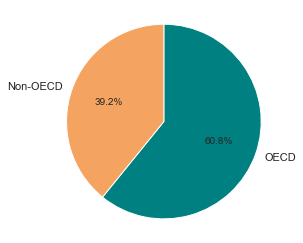

In [158]:
# code for the pie chart seen above
sorted_counts = df_clean['OECD'].value_counts()
colors = ['#008080', '#F4A460']
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,autopct='%1.1f%%',colors=colors,
        counterclock = False);
plt.axis('square');

>#### Proportions of OECD and Non OECD Countries that participated in the survey
As I was getting familiar with the dataset, It seemed interesting to know the proportions of OECD and Non_OECD Countries participants  in the survey. there are clearly much more OECD countries participants as they accounts for 60.8% of the survey's participants. But that is not really surprising as the PISA , the organizer of the survey is a part of the OECD.

### Visualization 2

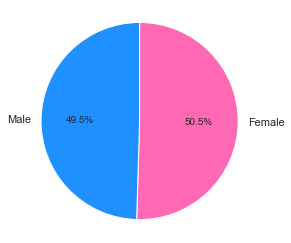

In [159]:
# code for the pie chart seen above
sorted_counts = df_clean['gender'].value_counts()
colors = ['#FF69B4','#1E90FF']
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,autopct='%1.1f%%',colors=colors,
        counterclock = False);
plt.axis('square');

> ## Proportion of Boys and Female Students in the survey
The proportion of boys and girls who participated in the survey is almost equal. <br>
The number of female students in the survey is a little little bigger than the number of male students who too the survey. but the difference is only of 0.5%. So we can almost confidently say that both gender equally participated in the survey.

## Section 2: understanding Math, Physics and Sciences Scores Distributions
In this section we will try to understand the Math, physics and Sciences Scores Distributions.<br>
In the analysis we will be comparing the following groups: 
* OECD and Non OECD  countries Math, Physics and Science scores distributions. 
* Female and male Math, Physics and Science Scores Distributions.
* But first we will try to see if in average students tends to succeed more in one subject compared to the others.

###  Visualization 3

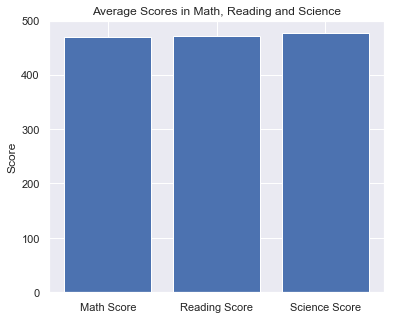

In [160]:
plt.figure(figsize=[6,5])
# plotting Math, Reading and Science Score to see if children tends to succeed more in one  
labels = ["Math Score", "Reading Score", "Science Score"]
usage = [df_clean['math_average'].mean(),df_clean['reading_average'].mean(), df_clean['science_average'].mean()]

# Generating the y positions. Later, we'll use them to replace them with labels.
y_positions = range(len(labels))

# Creating our bar plot
plt.bar(y_positions, usage)
plt.xticks(y_positions, labels)
plt.ylabel("Score")
plt.title("Average Scores in Math, Reading and Science")
plt.show()

>#### In general, Students Equally Succeed(or fail) in the field of Math, Reading and Science
My primary assumption would have been that students succeed more in one subject comparing to others. For example that they will do better in Reading for example, but in general I see that, based on this survey, students tend to equally succeed (or fail) in all 3 subjects. The mean scores in Math, Reading and Science is the almost the same. the mode is is also very close to the mean and remain almost the same in all 3 subjects. <br>
There is no subject where the average score is significantly higher or smaller than the others. 
It is important to quickly notice that the mean values are slightly below the average of 500. the test are scored on a 1000. 

### Visualization 4

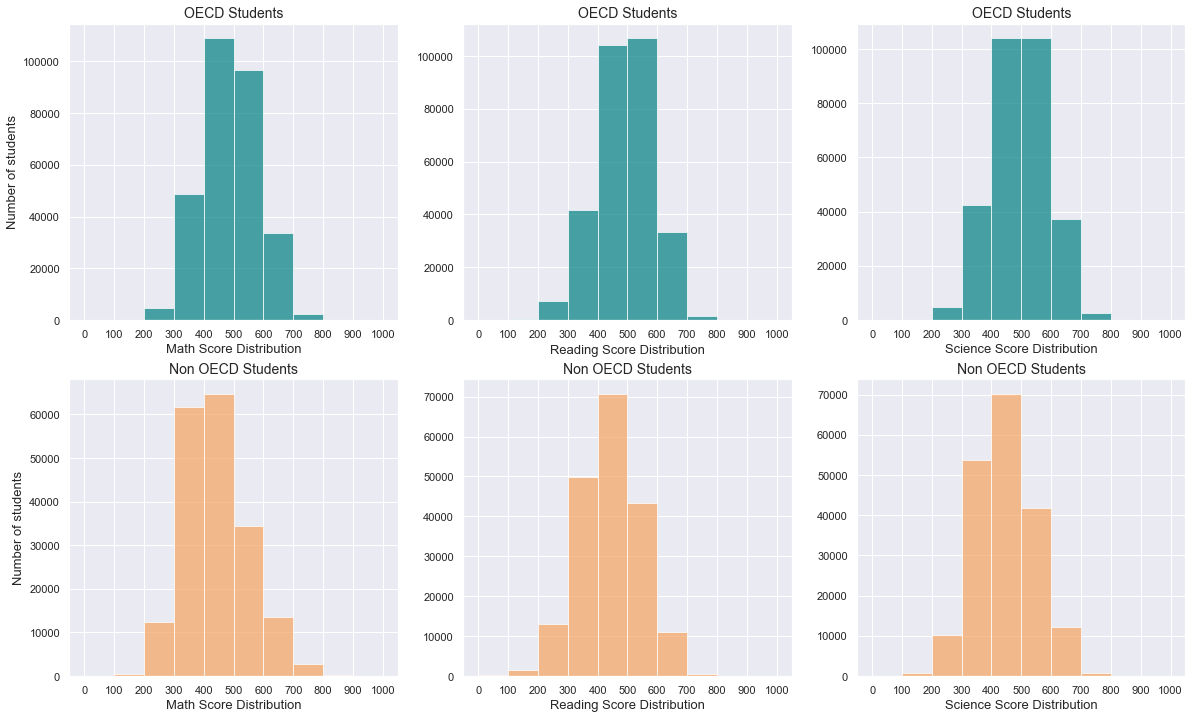

In [161]:
plt.figure(figsize = [20, 12])

bins_hist = np.arange(0, 1000 + 1, 100)
# 1st row  (OECD Countries)
plt.subplot(2, 3, 1)
color_OECD=['#008080']
color_NOECD = ['#F4A460']
xylabel = 13
title =14
plt.hist(OECD['math_average'], bins = bins_hist, alpha = 0.7, color=color_OECD);

plt.xticks(bins_hist)
plt.xlabel('Math Score Distribution',fontsize=xylabel);
plt.ylabel('Number of students',fontsize=xylabel)
plt.title("OECD Students", fontsize=title);

plt.subplot(2, 3, 2)
plt.hist(OECD['reading_average'], bins = bins_hist,  alpha = 0.7, color=color_OECD);

plt.xticks(bins_hist)
plt.xlabel('Reading Score Distribution',fontsize=xylabel);
plt.title("OECD Students",fontsize=title);

plt.subplot(2, 3, 3)
plt.hist(OECD['science_average'], bins = bins_hist, alpha = 0.7, color=color_OECD);

plt.xticks(bins_hist)
plt.xlabel('Science Score Distribution',fontsize=xylabel);
plt.title("OECD Students",fontsize=title);

# 2nd row (Non OECD Countries)

plt.subplot(2, 3, 4)

plt.hist(Non_OECD['math_average'], bins = bins_hist, alpha = 0.7, color=color_NOECD);

plt.xticks(bins_hist)
plt.xlabel('Math Score Distribution',fontsize=xylabel);
plt.ylabel('Number of students',fontsize=xylabel)
plt.title("Non OECD Students", fontsize=title);

plt.subplot(2, 3, 5)
plt.hist(Non_OECD['reading_average'], bins = bins_hist,  alpha = 0.7, color=color_NOECD);

plt.xticks(bins_hist)
plt.xlabel('Reading Score Distribution',fontsize=xylabel);
plt.title("Non OECD Students",fontsize=title);

plt.subplot(2, 3, 6)
plt.hist(Non_OECD['science_average'], bins = bins_hist, alpha = 0.7, color=color_NOECD);

plt.xticks(bins_hist)
plt.xlabel('Science Score Distribution',fontsize=xylabel);
plt.title("Non OECD Students",fontsize=title);

>#### Math, Reading and Science Score Distribution for OECD and Non OECD Countries
* Math Score: A big part of OECD countrie's students have a math score between 400 and 600. For the Non OECD Countries, we can see that the average is lower where a big part of Non OECD Countries have a Math Score between 300 and 500. <br>
It is also very interesting to observe that Non OECD countries have a bigger proportion of top students in Math (Score between 700 and 800) than the OECD Countries. But the opposite is also true , the number of students with really lower scores (between 100 and 300) is much higher in Non OECD countries. <br>
* Reading Score: For the OECD Countries an important portion of students had score between 400 and 600. with Non OECD Countries, the distribution is much more dispersed. but at the opposite of math score, Non OECD countries have less top students than OECD Countries. but in the score range between 100 and 300, we can see that  the proportion of Non OECD countries is much more important than those of OECD Countries. 
* Science Score: As with other subjects, the OECD Countries have a more centered distribution with most students having a score between 400 and 600. the tendency of Non OECD countries as with other subject is more dispersed. but for science score, the OECD has more top students than Non OECD Countries. 



### Visualization 5

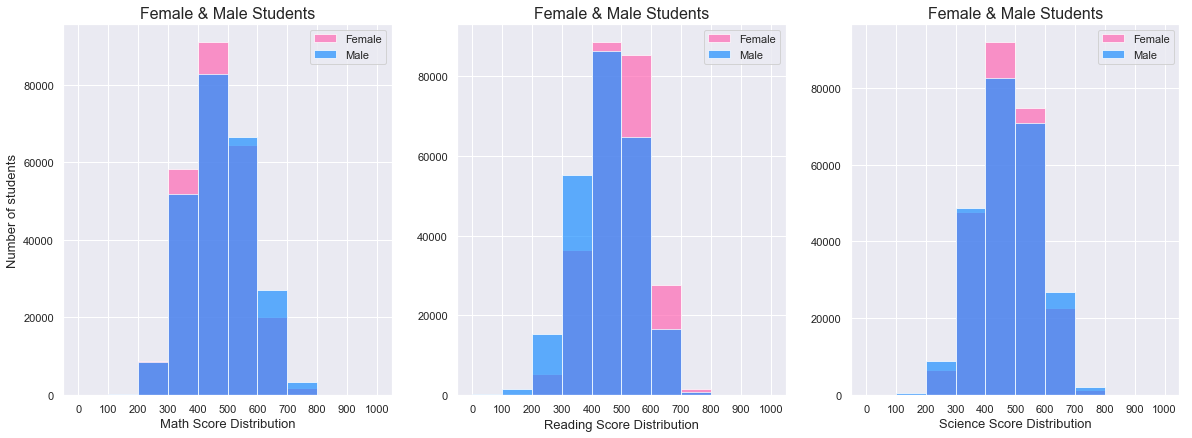

In [162]:
plt.figure(figsize = [20, 15])

bins_hist = np.arange(0, 1000 + 1, 100)
# 1st row  (OECD Countries)
plt.subplot(2, 3, 1)
color_girls= ['#FF69B4']
color_boys = ['#1E90FF']
alpha = 0.7
xylabel = 13
title =16
label = 'Female'
plt.hist(female['math_average'], bins = bins_hist, alpha = alpha, color=color_girls);
plt.hist(male['math_average'], bins = bins_hist, alpha = alpha, color=color_boys);

plt.xticks(bins_hist)
plt.ylabel('Number of students', fontsize=xylabel)
plt.title("Female & Male Students", fontsize=title);
plt.legend([ "Female", "Male"])

plt.xlabel('Math Score Distribution', fontsize=xylabel);
plt.subplot(2, 3, 2)
plt.hist(female['reading_average'], bins = bins_hist,  alpha = alpha, color=color_girls);
plt.hist(male['reading_average'], bins = bins_hist,  alpha = alpha, color=color_boys);
plt.xticks(bins_hist)
plt.xlabel('Reading Score Distribution', fontsize=xylabel);
plt.title("Female & Male Students", fontsize=title);
plt.legend([ "Female", "Male"])

plt.subplot(2, 3, 3)
plt.hist(female['science_average'], bins = bins_hist, alpha = alpha, color=color_girls);
plt.hist(male['science_average'], bins = bins_hist, alpha = alpha, color=color_boys);
plt.xticks(bins_hist)
plt.xlabel('Science Score Distribution', fontsize=xylabel);
plt.title("Female & Male Students", fontsize=title);
plt.legend([ "Female", "Male"]);

>#### Scores Distribution for Girls and Boys
* In Math  we can see that the score distribution tend to be the same for both female and male students. the number of female students in the range of 300 and 500 is bigger. while in the score range between 500 and 800, the number of male students is more important. Meaning that in mathematics, we have more male top students.
* The shape of the Reading score distribution also tend to be the same for both genders. but in the score range between 400 and 800, female students seems to have higher. simply meaning that you have more top female students in Reading. while the number of male student with lower scores (between 100 and 400) is much more important compared to the proportion of female students in the same group. 
* Female students tends to do well in Science. but the proportion of top male students is bigger. equally, the proportion of students with lower score is also more important among male students. overall the number of female students tends to be higher in the range between 400 and 600.

### Section 3: Time (in minutes) Students Spend on a computer

### Visualization 6 

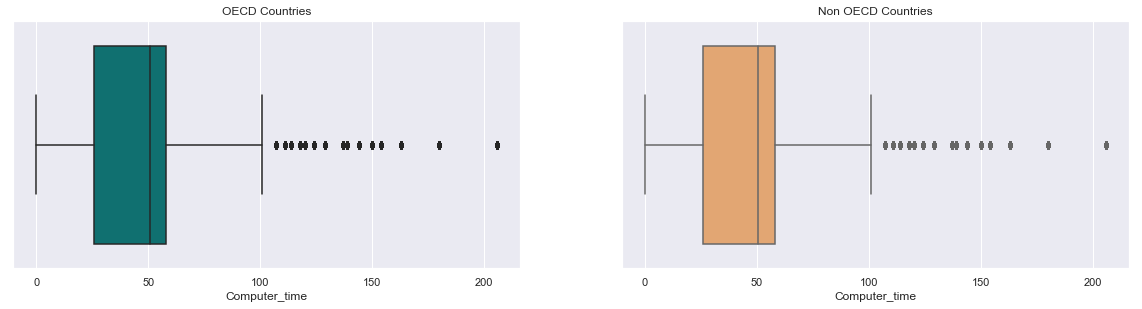

In [163]:
plt.figure(figsize = [20, 10])
color_OECD='#008080'
color_NOECD = '#F4A460'

bins_hist = np.arange(0,210, 10)
# 1st row  
plt.subplot(2, 2, 1)
ax = sb.boxplot(x=OECD['Computer_time'], color=color_OECD).set_title('OECD Countries')

plt.subplot(2, 2, 2)
ax = sb.boxplot(x=OECD['Computer_time'], color=color_NOECD).set_title('Non OECD Countries')

>#### OECD and Non OECD  Computer Time Distribution
In the above 2 box plots, we can see the minimum, maximun, median values, the range of time that most students spend on their computer. here we can see that both plots are quite similar.
* the minimum amount of time spent on a computer is 0 in both OECD countries and Non OECD countries.  
* the maximum is the same, around a 100 minutes. 
* the median value is 50 min. 
* Even the outliers points seems to be pointing in the same directions ranging in both OECD countries and non OECD countries between 10 and a little over 200 minutes spent on the computer.

### Visualization 7

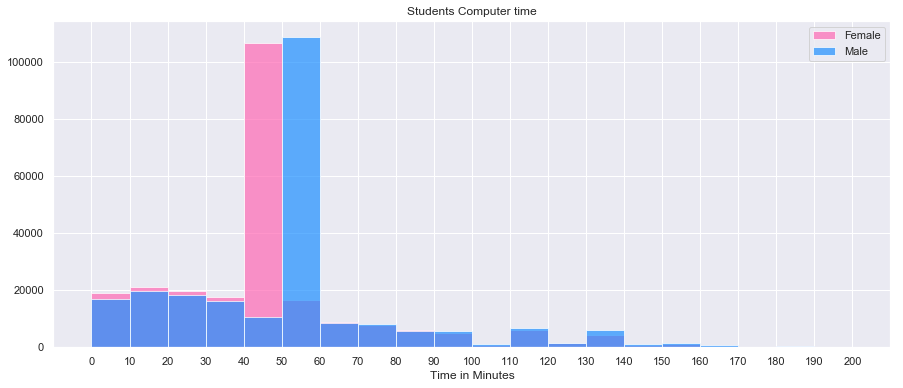

In [164]:
plt.figure(figsize = [15, 6])

color_girls= '#FF69B4'
color_boys = '#1E90FF'

bins_hist = np.arange(0,210, 10)
plt.hist(female['Computer_time'], bins = bins_hist, alpha = 0.7, color=color_girls);
plt.hist(male['Computer_time'], bins = bins_hist, alpha = 0.7, color=color_boys);
plt.xticks(bins_hist)
plt.xlabel('Time in Minutes');
plt.title("Students Computer time")
plt.legend(["Female", "Male"]);


>#### Male and Female Students computer time distribution
For the visualization of the amount of time spent on the computer by both female and male students, I chose this plot because the two groups proportions are equal. so we can see that two groups distributions is almost the same but 
* a big portion of female students seems to spend somewhere between 40 and 50 minutes on computer
* a big portion of male students seems to spend somewhere between 50 and 60 minutes on computer

## Bivariate Exploration
> In this section, I will do the following analysis: 
* Do a comparison of averages scores for my groups of interests, in each subject (Math, Reading and Science)
* Study the relationship between time spent on computer and the average score obtained by the students. 
<br> I will still be comparing OECD  to Non OECD countries and Female and male students.

### Visualization 8

In [165]:
OECD_scores = OECD['math_average'].mean() , OECD['reading_average'].mean(), OECD['science_average'].mean()
Non_OECD_scores = (Non_OECD['math_average'].mean(),Non_OECD['reading_average'].mean(),Non_OECD['science_average'].mean())
male_scores = (male['math_average'].mean(),male['reading_average'].mean(),male['science_average'].mean())
female_scores = (female['math_average'].mean(),female['reading_average'].mean(),female['science_average'].mean())

In [176]:
OECD_scores

(488.4012368806699, 490.79673282096957, 494.9216082561551)

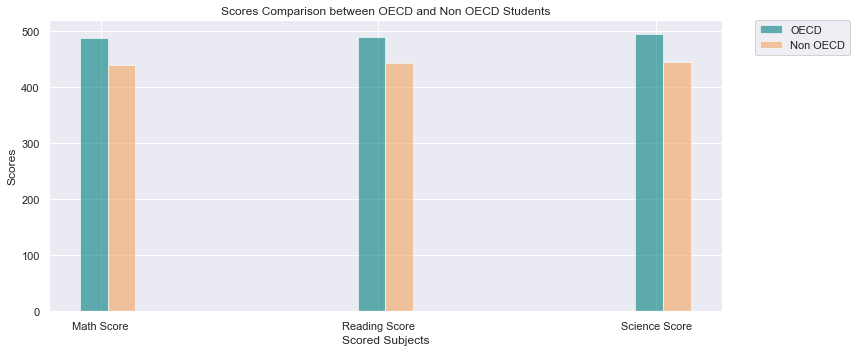

In [174]:
# data to plot

n_groups = 3

OECD_scores = (488.4012368806699, 490.79673282096957, 494.9216082561551)
Non_OECD_scores = (440.5096842789633, 442.80361003051013, 446.1015696309864)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.6

rects1 = plt.bar(index, OECD_scores, bar_width, alpha=opacity, color=color_OECD,label='OECD')
rects2 = plt.bar(index + bar_width,Non_OECD_scores, bar_width, alpha=opacity, color=color_NOECD, label='Non OECD')

rcParams['figure.figsize'] = 12,4

ax.set_xlabel('Scored Subjects')
ax.set_ylabel('Scores')
ax.set_title('Scores Comparison between OECD and Non OECD Students')
ax.set_xticks(index + bar_width / 4)
ax.set_xticklabels(('Math Score', 'Reading Score', 'Science Score'))

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.tight_layout()
plt.show ()

> #### Scores Comparison between OECD and Non OECD Countries For Math, Reading and Science
In General we can see that in all 3 subjects where students were tested, OECD countries consistently do better than Non OECD countries. <br> 
This confirms what we have previously seen while plotting the scores distribution in the univariate analysis section

### Visualization 9

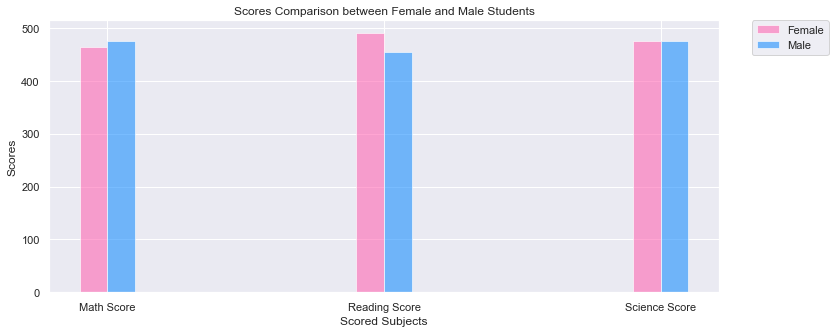

In [178]:
# data to plot

n_groups = 3

male_scores = (475.3493465528562, 453.9525261445896, 476.27639791470205)
female_scores = (464.06096174738224, 489.71970972947065, 475.3486531093991)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.6

rects1 = plt.bar(index, female_scores, bar_width, alpha=opacity, color=color_girls,label='Female')
rects2 = plt.bar(index + bar_width,male_scores, bar_width, alpha=opacity, color=color_boys, label='Male')

rcParams['figure.figsize'] = 12, 5

ax.set_xlabel('Scored Subjects')
ax.set_ylabel('Scores')
ax.set_title('Scores Comparison between Female and Male Students')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Math Score', 'Reading Score', 'Science Score'))

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show ()

> #### Scores Comparison between Female and Male Students
when we compare the mean scores: 
* Male students slightly to better than female students in Math. 
* In the Reading test, female students did better than male students
* Lastly, In the science test, the male and female scores are equal

### Visualization 10

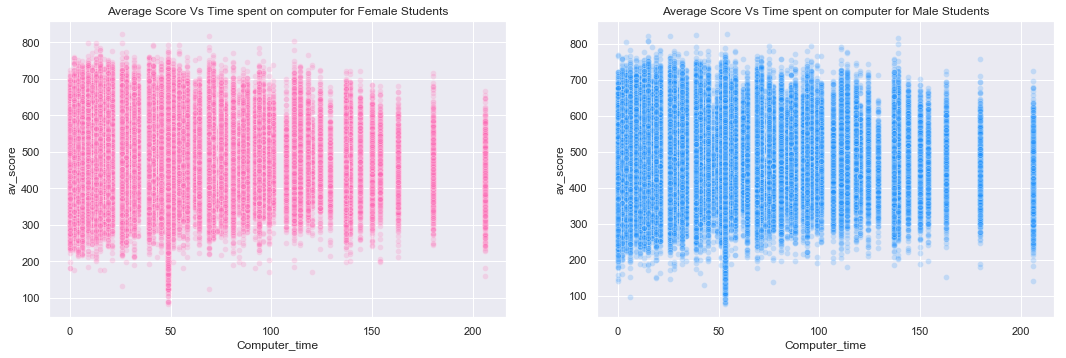

In [169]:
plt.figure(figsize = [18, 12])
plt.subplot(2,2, 1)
ax = sb.scatterplot(y="av_score", x="Computer_time",  alpha=0.2, data=female, color=color_girls).set_title('Average Score Vs Time spent on computer for Female Students')
plt.subplot(2, 2, 2)
ax = sb.scatterplot(y="av_score", x="Computer_time",  alpha=0.2, data=male, color=color_boys).set_title('Average Score Vs Time spent on computer for Male Students')

> #### Relationship Between Time Spent on Computers and Scores
In order to simplify this task, I made an average score of the 3 subjects. The objective being to understand if spending more or less time on the computer has any effects on marks. 
It seems like, based on the data we have, that the time spent on the computer doesn't really affect the scores. students who spent very little computer time are as likely to get really good scores or really bad one. <br>
It's also seems from 150 minutes of time spent on the computer, the concentration of top students (score above 700) really goes down. <br> 
The tendency doesn't vary much across our 4 groups. The time spent on computer doesn't have an effect on the scores. 

### Visualization 11

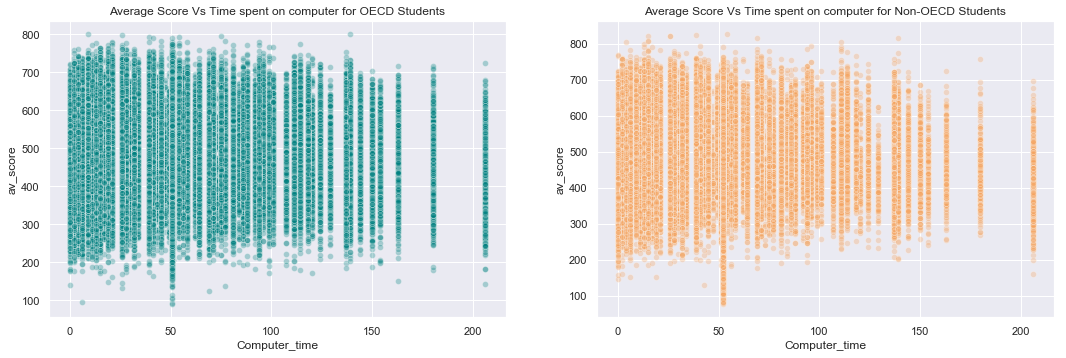

In [171]:
plt.figure(figsize = [18, 12])
plt.subplot(2, 2, 3)
ax = sb.scatterplot(y="av_score", x="Computer_time",  data=OECD,alpha=0.3, color=color_OECD).set_title('Average Score Vs Time spent on computer for OECD Students')
plt.subplot(2, 2, 4)
ax = sb.scatterplot(y="av_score", x="Computer_time",  data=Non_OECD,alpha=0.3, color=color_NOECD).set_title('Average Score Vs Time spent on computer for Non-OECD Students')

> ## Bivariate Exploration Summary: 
* In average, OECD countries consistently do better than Non OECD countrie in all 3 subjects
* Male students in average did a little bit better than female students in the test math
* female student did better than male students in reading
* both genders had the same average scores in science test
* the time the students spend on their computer doesn't really affect their scores, even if above 150 minutes of time spent on the computer, the concentration of top students (above 700) really diminish. 


## Multivariate Exploration

> In this section,I am going to do a Pair plot, continuing the comparison of the math, reading and sciences scores across our groups of interest. 

### Visualization 12

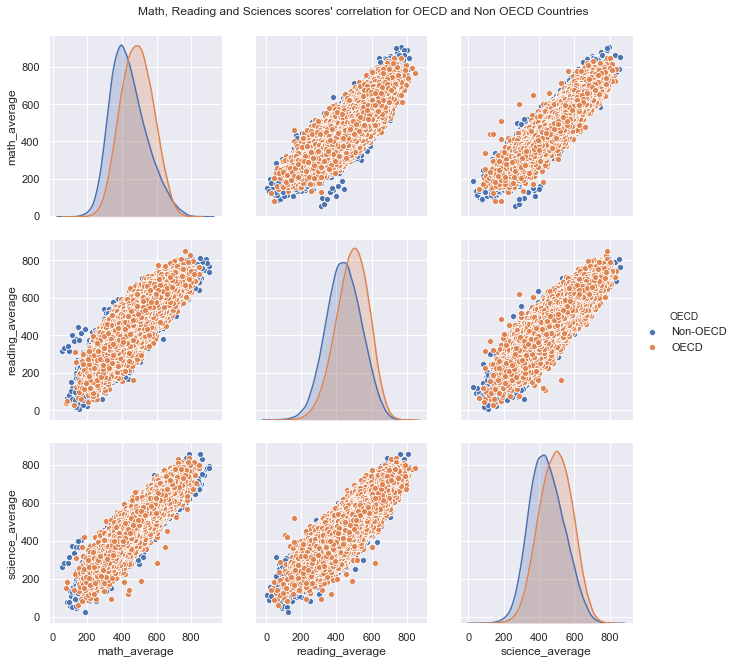

In [172]:
g = sb.pairplot(data = df_clean, height=3, vars = ['math_average', 'reading_average', 'science_average'], hue="OECD");
g.fig.suptitle("Math, Reading and Sciences scores' correlation for OECD and Non OECD Countries", y = 1.02);

>#### Pair to Pair Analysis for Math, Reading and Physics Scores, Comparison between OECD and Non OECD Countries
This plot is confirming what we have seen since the beginning of the analysis, the OECD average in all 3 subjects tends to be higher than the average of non OECD countries. <br>
But the new and very interesting discovery is the almost perfect correlation between the score in all 3 subjects. <br>
Simply meaning that students who succeed in one subjects are also getting good scores in the other two subjects.

### Visualization 13

Text(0.5, 1.02, "Math, Reading and Sciences scores' correlation for female and male students")

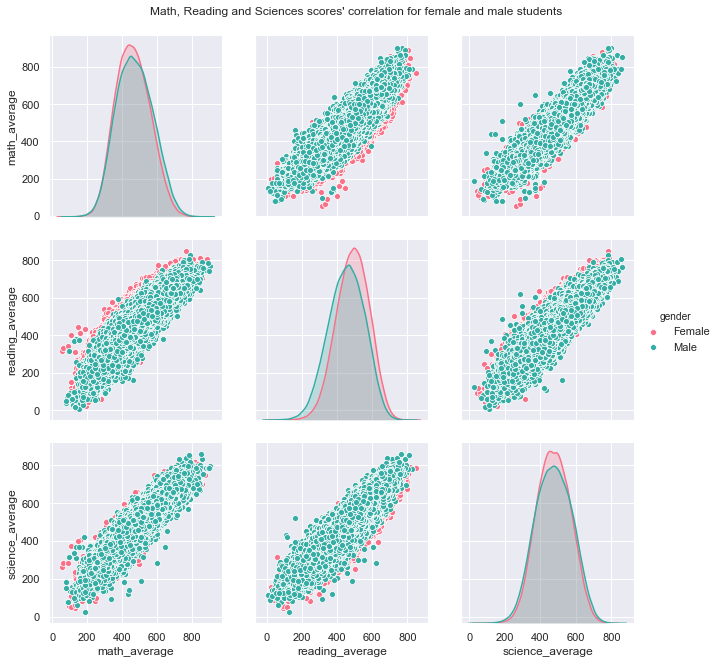

In [173]:
g = sb.pairplot(data = df_clean, height= 3, vars = ['math_average', 'reading_average', 'science_average'], hue="gender", palette="husl")
g.fig.suptitle("Math, Reading and Sciences scores' correlation for female and male students", y = 1.02)

>#### Pair to Pair Analysis for Math, Reading and Physics Scores, Comparison between Male and Female Students
This plot is confirming what we have seen since the beginning of the analysis, there divergences between genders depending on the subject. 
But here again,  the new and very interesting discovery is the almost perfect correlation between the score in all 3 subjects. <br>
Simply meaning that students who succeed in one subjects are also getting good scores in the other two subjects, regardless of the gender

## References:
* PISA 2012 contest winner: http://mi2.mini.pw.edu.pl:8080/SmarterPoland/PISAcontest/
* What is PISA: http://www.oecd.org/pisa/
* OECD: https://en.wikipedia.org/wiki/OECD
* PISA 2012 Countries : http://www.oecd.org/pisa/aboutpisa/pisa-2012-participants.htm
* PISA 2012 Data analysis Manual:http://archivos.agenciaeducacion.cl/Manual_de_Analisis_de_datos_SPSS_version_ingles.pdf
* PISA Data Exploration : https://github.com/brunoassisp/PISA-Data-Viz-project/blob/master/PISA_EDA.ipynb
* Jasccyang github repository : https://github.com/jasccyang/PISA2012/blob/master/Reducing%20File%20Size.ipynb
* Seby Sbirna Github repository: https://github.com/seby-sbirna/Data-Analyst-Nanodegree-Project-Portfolio/blob/master/Project%205%20-%20Communicate%20Data%20Findings/Project%205%20-%20Sebastian%20Sbirna.ipynb
* Visualization: https://www.researchgate.net/figure/Responses-to-Relating-to-your-last-five-publications-how-often-did-you-incorporate-the_fig1_328394497
* Udacity Classroom: https://classroom.udacity.com/nanodegrees/nd002/parts/9f7e8991-8bfb-4103-8307-3b6f93f0ecc7
* BarPlot with matplotlib: https://towardsdatascience.com/data-science-with-python-intro-to-data-visualization-and-matplotlib-5f799b7c6d82
* Pivot table: https://www.dataquest.io/blog/pandas-pivot-table
* Pandas stack:https://stackoverflow.com/questions/49098380/pandas-condense-survey-results
* Reshaping Dataframe: https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
* colors: https://www.rapidtables.com/web/color/RGB_Color.html
* Matplotlib legend: https://stackoverflow.com/questions/44413020/how-to-specify-legend-position-in-matplotlib-in-graph-coordinates